In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import fftconvolve

In [2]:
def intensity(x, y, radius):
    d_squared = x**2 + y**2
    mask = d_squared <= radius**2
    result = np.zeros_like(d_squared)
    result[mask] = 1/2 * (1 + np.cos(d_squared[mask]))
    return result

In [3]:
def sample_function(func, radius, step):
    u, v = np.meshgrid(np.arange(-radius, radius, step), np.arange(-radius, radius, step))
    N = u.shape[0]
    x, y = np.meshgrid(np.arange(N), np.arange(N))
    img = np.zeros((N, N))
    img[x, y] = func(u, v, radius)
    return img

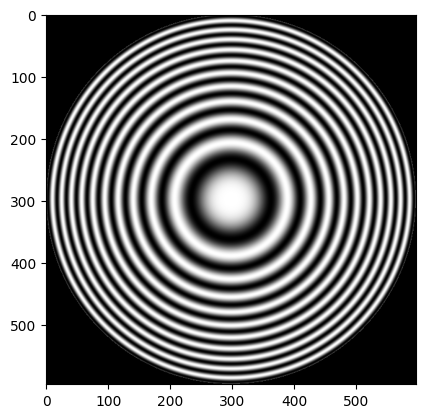

In [4]:
img = sample_function(intensity, 8.2, 0.0275)
plt.imshow(img, cmap='grey')

In [21]:
def lowpass(x, y, _):
    d = (x**2 + y**2)**0.5
    return np.sin(np.pi * d) / (np.pi * d)
kernel = sample_function(lowpass, 8.2, 0.1)

In [6]:
# filtered_img = convolve2d(img, kernel)
# plt.imshow(filtered_img, cmap='grey')

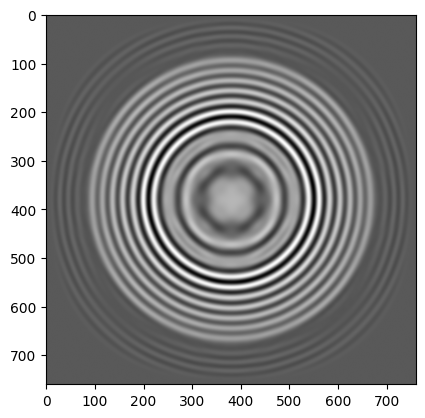

In [22]:
filtered_img = fftconvolve(img, kernel)
plt.imshow(filtered_img, cmap='grey')